## Exercise 08.1

Consider the function 

$$
f(x) = e^{x/10} \sin(\omega_{1}x)\cos(\omega_{0}x)
$$

from $x = -4\pi$ to $x = 4\pi$.  

1. Plot the function when $\omega_{0} = \omega_{1} = 1$. Label the axes.
1. Create an interactive plot with sliders for $\omega_{0}$ and $\omega_{1}$, varying from 0 to 2.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import matplotlib

In [3]:
matplotlib.rcParams.update({'font.size': 12, 'figure.figsize': (10, 7) })

In [4]:
x = np.linspace(-4*np.pi, 4*np.pi, num=1000)

In [5]:
y = np.exp(x/10) * np.sin(x) * np.cos(x)

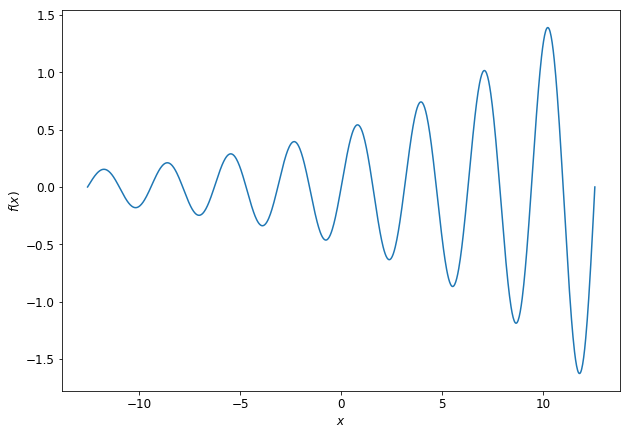

In [6]:
plt.plot(x, y);
plt.xlabel('$x$')
plt.ylabel('$f(x)$');

In [7]:
import ipywidgets
from ipywidgets import interact

In [9]:
def plot(w0 = 1, w1 = 1):
    x = np.linspace(-4*np.pi, 4*np.pi, 1000)
    y = np.exp(x/10) * np.sin(w1 * x) * np.cos(w0 * x)
    plt.plot(x, y)
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('$\omega_1$ = {}, $\omega_0$ = {}'.format(w1, w0))

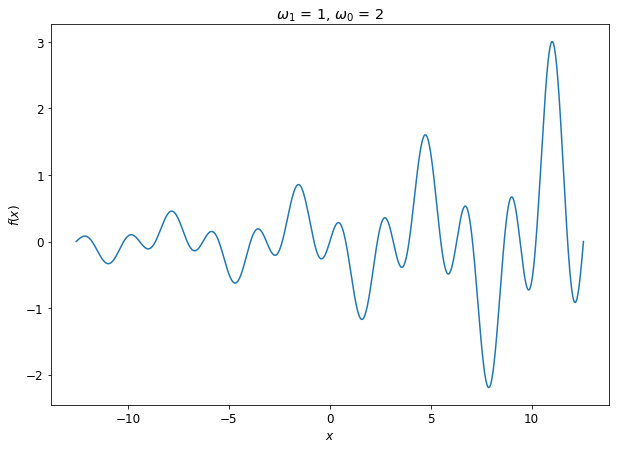

In [10]:
interact(plot, w1 = 1, w0 = 1);